In [67]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd
from matplotlib import cm
import plotly.express as px

In [51]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/4_ThreeNum.csv'
data = pd.read_csv(url)
data

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.828,31889923,974.580338
1,Albania,Europe,76.423,3600523,5937.029526
2,Algeria,Africa,72.301,33333216,6223.367465
3,Angola,Africa,42.731,12420476,4797.231267
4,Argentina,Americas,75.320,40301927,12779.379640
...,...,...,...,...,...
137,Vietnam,Asia,74.249,85262356,2441.576404
138,West Bank and Gaza,Asia,73.422,4018332,3025.349798
139,"Yemen, Rep.",Asia,62.698,22211743,2280.769906
140,Zambia,Africa,42.384,11746035,1271.211593


# Bubble Plot

Text(0, 0.5, 'Life Expectancy')

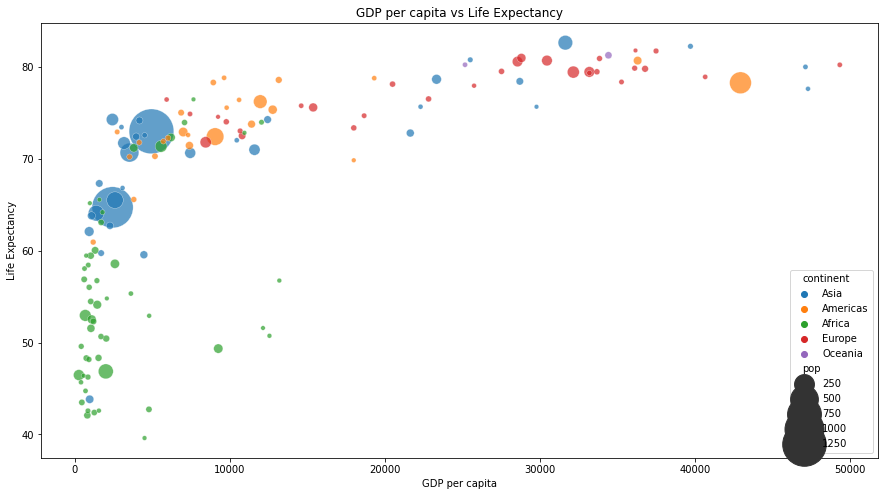

In [22]:
tmp = data
tmp["pop"] = tmp["pop"]/1000000

# Sort tmp by population in descending order
tmp = tmp.sort_values(by="pop", ascending=False)
plt.figure(figsize = (15,8))
# Create a scatter plot
sns.scatterplot(x="gdpPercap", y="lifeExp", size="pop", hue="continent", data=tmp, alpha=0.7,sizes = (20,2000))

# Scale size of points based on population
#sns.scatterplot.set(xscale="log", yscale="log")

# Add a title and axis labels
plt.title("GDP per capita vs Life Expectancy")
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")

## Variations

Text(0, 0.5, 'Population (M)')

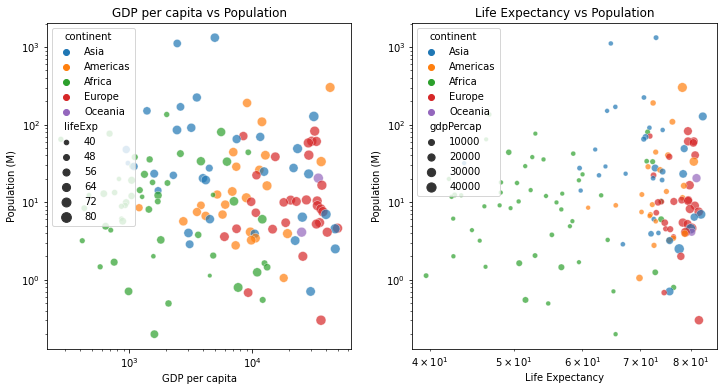

In [35]:
tmp = data
tmp["pop"] = tmp["pop"]/1000000
tmp = tmp.sort_values(by="pop", ascending=False)

f, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(x="gdpPercap", y="pop", size="lifeExp", hue="continent", data=tmp, alpha=0.7, ax=ax[0],sizes = (20,100))
ax[0].set(xscale="log", yscale="log")
ax[0].set_title("GDP per capita vs Population")
ax[0].set_xlabel("GDP per capita")
ax[0].set_ylabel("Population (M)")

sns.scatterplot(x="lifeExp", y="pop", size="gdpPercap", hue="continent", data=tmp, alpha=0.7, ax=ax[1],sizes = (20,100))
ax[1].set(xscale="log", yscale="log")
ax[1].set_title("Life Expectancy vs Population")
ax[1].set_xlabel("Life Expectancy")
ax[1].set_ylabel("Population (M)")

## Annotated

Text(0, 0.5, 'Life Expectancy')

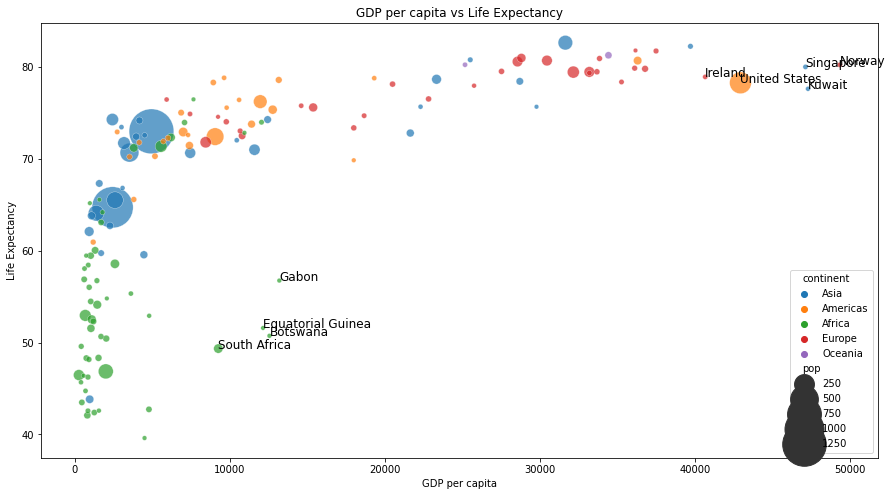

In [29]:
tmp = data
tmp["annotation"] = np.where((tmp["gdpPercap"] > 5000) & (tmp["lifeExp"] < 60), "yes",
                            np.where(tmp["lifeExp"] < 30, "yes",
                                     np.where(tmp["gdpPercap"] > 40000, "yes",
                                              "")))
# Divide population by 1000000
tmp["pop"] = tmp["pop"]/1000000

# Sort data by population in descending order
tmp = tmp.sort_values(by="pop", ascending=False)
plt.figure(figsize = (15,8))
# Create a scatter plot
sns.scatterplot(x="gdpPercap", y="lifeExp", size="pop", hue="continent", data=tmp, alpha=0.7,sizes = (20,2000))

# Scale size of points based on population
#sns.scatterplot.set(xscale="log", yscale="log")

# Add text annotations for specified countries
for i, row in tmp[tmp["annotation"] == "yes"].iterrows():
    plt.annotate(row["country"], (row["gdpPercap"], row["lifeExp"]), fontsize=12)

# Add a title and axis labels
plt.title("GDP per capita vs Life Expectancy")
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")

## Interactive

In [52]:
data["gdpPercap"] = round(data["gdpPercap"],0)
data["pop"] = round(data["pop"]/1000000,2)
data["lifeExp"] = round(data["lifeExp"],1)

data = data.sort_values(by="pop", ascending=False)
data["text"] = "Country: " + data["country"] + "<br>" + "Population (M): " + data["pop"].astype(str) + "<br>" + "Life Expectancy: " + data["lifeExp"].astype(str) + "<br>" + "Gdp per capita: " + data["gdpPercap"].astype(str)

fig = px.scatter(data_frame=data, x='gdpPercap', y='lifeExp', size='pop', color='continent', hover_data=["text"],
                 size_max=60, log_x=True, log_y=True)
fig.update_layout(title='Gdp per capita vs Life Expectancy',
                  xaxis_title='Gdp per capita',
                  yaxis_title='Life Expectancy',
                  )
fig.show()

# Volcano 

C:\Users\susim\AppData\Local\Temp/ipykernel_13748/2590437550.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



(87, 61)


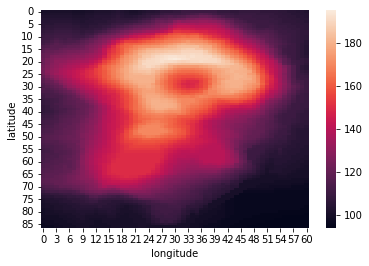

In [68]:
url = 'https://userpages.umbc.edu/~gobbert/teaching/teaching1997to2004/math426.s2002/volcanoz.dat'
data = pd.read_csv(url, sep='   ', header=None).T
print(data.shape)

sns.heatmap(data.values)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [69]:
fig = go.Figure(data=[go.Surface(z=data)])
fig.show()